# Imports.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load data.

In [2]:
train_csv = 'data/train.csv'
center_csv = 'data/fulfilment_center_info.csv'
meal_csv = 'data/meal_info.csv'

In [3]:
train_df = pd.read_csv(train_csv)
center_df = pd.read_csv(center_csv)
meal_df = pd.read_csv(meal_csv)

In [4]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
center_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
meal_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


## Meal category.

In [7]:
category = meal_df.category.unique()
print(category)
print(len(category))

['Beverages' 'Extras' 'Soup' 'Other Snacks' 'Salad' 'Rice Bowl' 'Starters'
 'Sandwich' 'Pasta' 'Desert' 'Biryani' 'Pizza' 'Fish' 'Seafood']
14


## Meal cuisine.

In [8]:
meal_df.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

## Region and city.

In [9]:
center_df.region_code.unique()

array([56, 34, 77, 85, 23, 71, 35, 93])

In [10]:
center_df.city_code.unique()

array([679, 590, 648, 632, 553, 593, 693, 526, 562, 699, 478, 576, 713,
       654, 515, 647, 676, 698, 628, 680, 620, 604, 649, 596, 522, 675,
       473, 556, 659, 541, 577, 683, 638, 700, 456, 695, 602, 703, 651,
       485, 685, 461, 702, 615, 614, 599, 579, 517, 609, 658, 561])

In [11]:
for i in center_df.groupby('region_code')['city_code'].unique():
    print(i)

[698]
[648 632 693 526 576 676 649 675 602 461 615 658]
[702]
[679 590 654 647 604 522 577 683 638 700 456 703 685 599 579 517]
[596]
[553 593 562 478 515 628 680 620 473 556 659 541 695 651 485 561]
[699 713 614]
[609]


## Center list.

In [12]:
list_of_center = center_df.center_id.unique()
list_of_center

array([ 11,  13, 124,  66,  94,  64, 129, 139,  88, 143, 101,  86,  32,
       149, 152,  92,  27,  14,  26, 104,  77,  23,  97, 146, 113, 145,
        80,  55, 186,  99,  91,  20, 106,  81,  73,  29,  43, 102,  61,
        50,  83,  57, 126, 177,  67, 174,  59,  58,  65,  39, 132,  89,
       162,  75,  72,  41,  10, 110,  52,  93,  74,  34, 137, 153,  24,
       109, 108,  36, 157,  17, 161,  42,  53,  30,  76,  68,  51])

## Join dataframe.

In [13]:
train_df = train_df.join(center_df.set_index('center_id'), on='center_id')
train_df = train_df.join(meal_df.set_index('meal_id'), on='meal_id')

In [14]:
train_df['sum_checkout_price'] = train_df.checkout_price * train_df.num_orders

In [15]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sum_checkout_price
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,36944.10
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,25488.54
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,18333.00
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,9740.00


In [16]:
labelEncoder = LabelEncoder()
train_df['category'] = labelEncoder.fit_transform(train_df['category'])
train_df['cuisine'] = labelEncoder.fit_transform(train_df['cuisine'])
train_df['center_type'] = labelEncoder.fit_transform(train_df['center_type'])

In [17]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,sum_checkout_price
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3,24218.91
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2,2.0,0,3,36944.10
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2,2.0,0,3,25488.54
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2,2.0,0,1,18333.00
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2,2.0,0,1,9740.00


# Data visualization.

Add date to dataframe based on date of upload datasets.

In [18]:
data_upload = datetime.strptime('2020-01-08', '%Y-%m-%d')
num_of_weeks = train_df.week.max()
date_generated = [data_upload - timedelta(weeks=x) for x in range(0, num_of_weeks)]
dates = list(date_generated)
dates = dates[::-1]
train_df['date'] = train_df.week.apply(lambda x: dates[x-1])

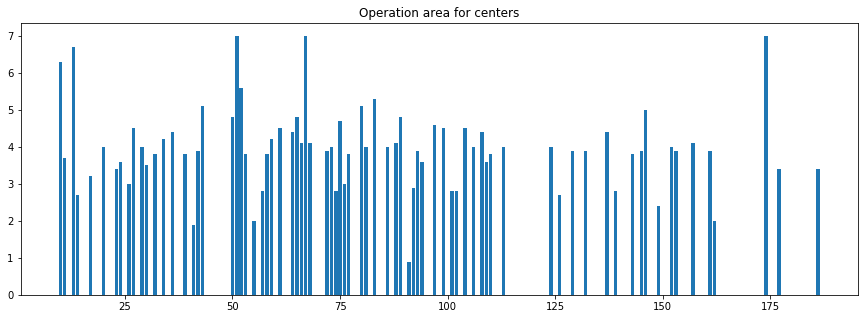

In [19]:
sort_center_id = center_df.sort_values(['center_id'])
x = sort_center_id['center_id']
y = sort_center_id['op_area']
plt.figure(figsize=(15, 5))
plt.title('Operation area for centers')
plt.bar(x, y);

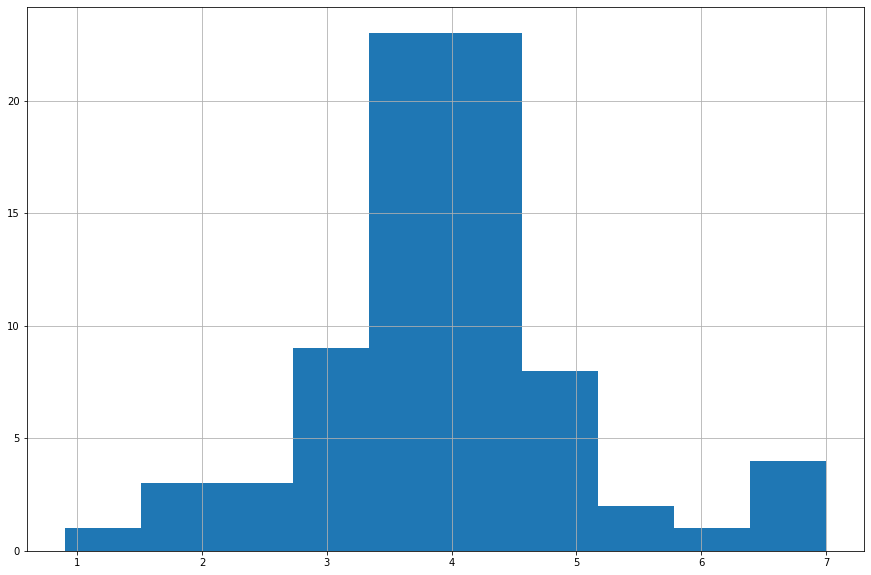

In [20]:
sort_center_id.op_area.hist(figsize=(15, 10));

## Corelation between number of orders and operation area.

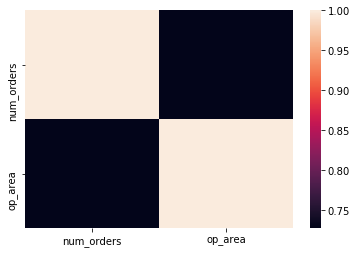

In [38]:
sum_num_orders = train_df.groupby(['center_id'])['num_orders'].sum().to_frame()
sum_num_orders = sum_num_orders.join(center_df[['center_id', 'op_area']].set_index('center_id'), on='center_id')
corr = sum_num_orders.corr()
sns.heatmap(corr)

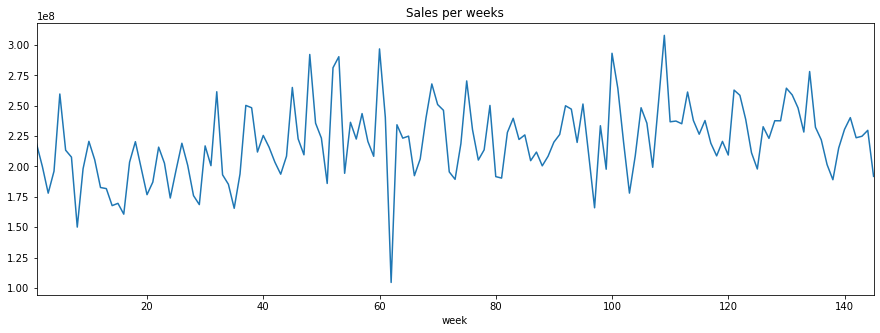

In [21]:
train_df.groupby(['week'])['sum_checkout_price'].sum().plot(title = 'Sales per weeks', figsize=(15,5));

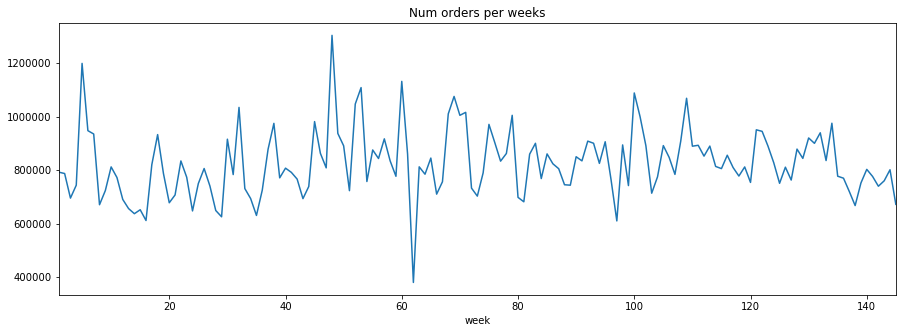

In [22]:
train_df.groupby(['week'])['num_orders'].sum().plot(title = 'Num orders per weeks', figsize=(15,5));

In [23]:
x = [ train_df[train_df.center_id == id] for id in list_of_center ]

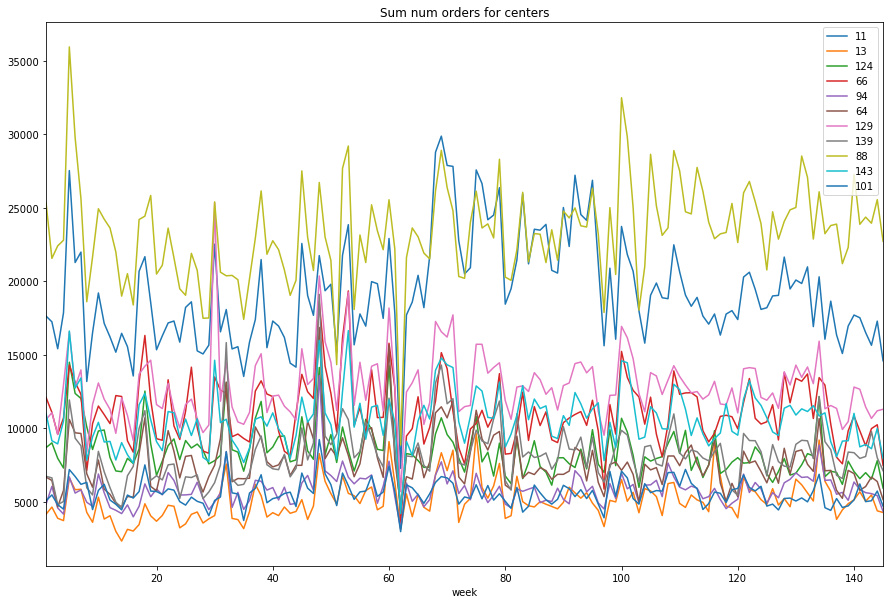

In [24]:
plt.title('Sum num orders for centers')
[ df.groupby(['week'])['num_orders'].sum().plot(figsize=(15, 10), label=list_of_center[i]) 
 for i, df in enumerate(x[::7]) ];
plt.legend();
